Let's load up our data and get our dates. We also want to extract the year.

In [1]:
import pandas as pd

DATA = '/kaggle/input/intel-stock-data-1980-2024/data.csv'
df = pd.read_csv(filepath_or_buffer=DATA,)
df['date'] = pd.to_datetime(df['Date'].apply(func=lambda x: str(x).split(' ')[0]))
df['year'] = df['date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,year
0,1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0,1980-03-17,1980
1,1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0,1980-03-18,1980
2,1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0,1980-03-19,1980
3,1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0,1980-03-20,1980
4,1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0,1980-03-21,1980


Let's look at the price/volume correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999836,0.999843,0.999668,-0.214690
High,0.999836,1.000000,0.999760,0.999825,-0.212102
Low,0.999843,0.999760,1.000000,0.999841,-0.217666
Close,0.999668,0.999825,0.999841,1.000000,-0.215027
Volume,-0.214690,-0.212102,-0.217666,-0.215027,1.000000


What do we see? We see that while the prices are highly correlated, none of them are duplicates. We also see that the prices and the volume are somewhat negatively correlated. This is typical of what we see with long stock price time series data.

<Axes: xlabel='date', ylabel='Close'>

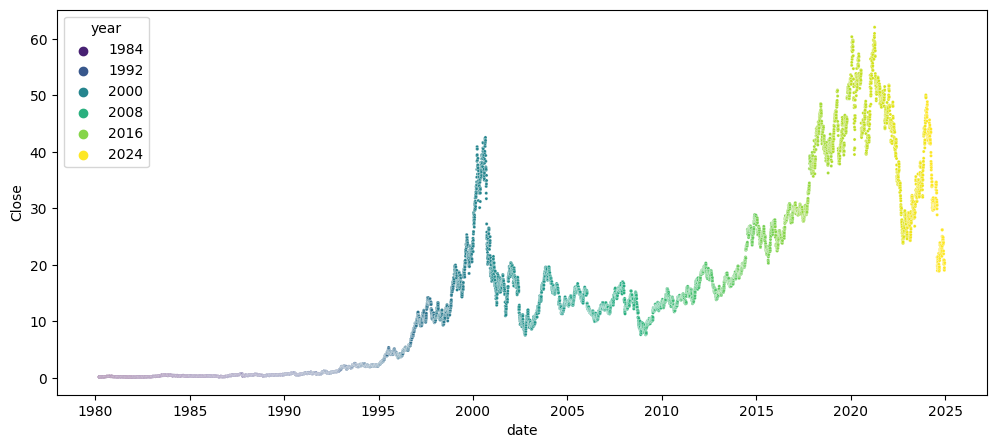

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='date', y='Close', hue='year', palette='viridis', s=5)

What do we see? We see a huge run-up over the course of twenty years through early 2000, then a totally different story thereafter. The stock has good years and bad years, but at the end of the period of interest it isn't much higher than it was twelve years earlier.

What do we see if we look at the log of the price over time?

<Axes: xlabel='date', ylabel='Close'>

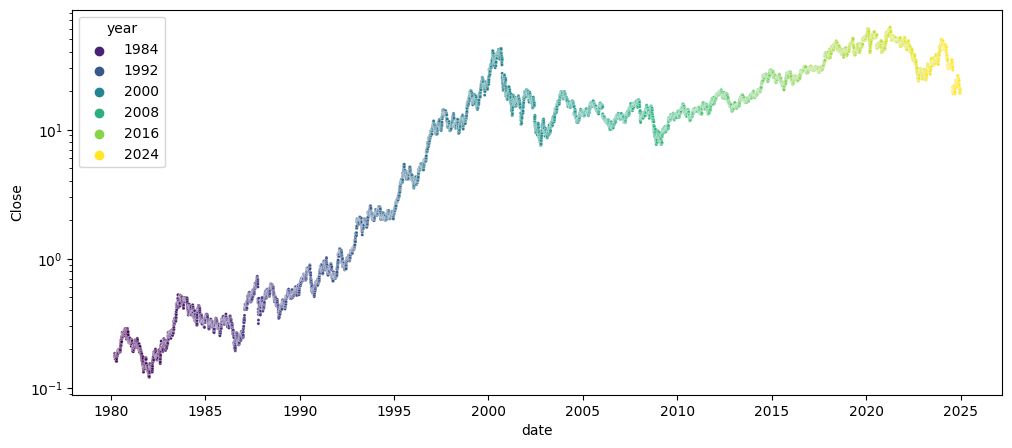

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='date', y='Close', hue='year', palette='viridis', s=5)

If we plot the log of the price over time the run-up through early 2000 still stands out, and the stock looks like it has traded in a range since then, which it has, but looking at the log of the price makes that range look substantially smaller.

Let's have a look at the price-volume relationship over time. We expect the volume to be lower when prices are higher on average, but other than that we don't know what to expect.

<Axes: xlabel='Close', ylabel='Volume'>

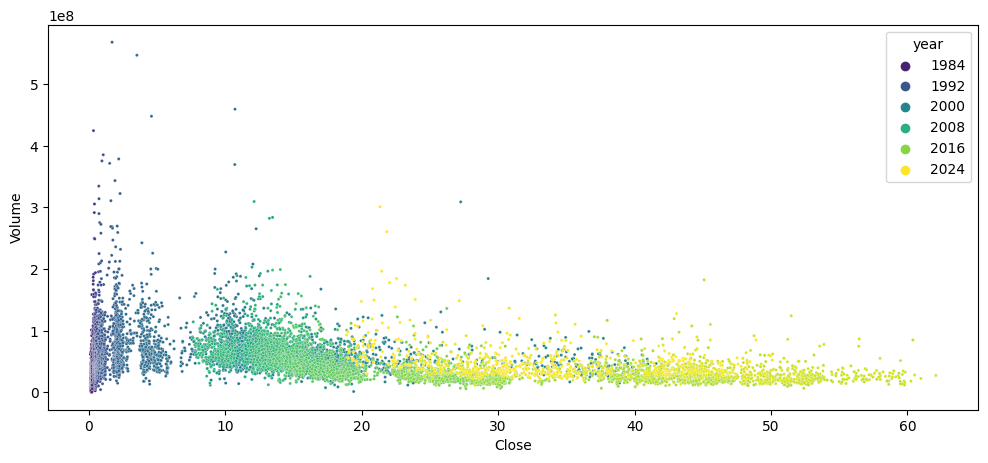

In [5]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis', s=5)

If we plot the volume as a function of the price we see mostly constant behavior, with a slight downward trend, but the Y direction is dominated by a few outliers. Let's look at the log of the volume instead.

<Axes: xlabel='Close', ylabel='Volume'>

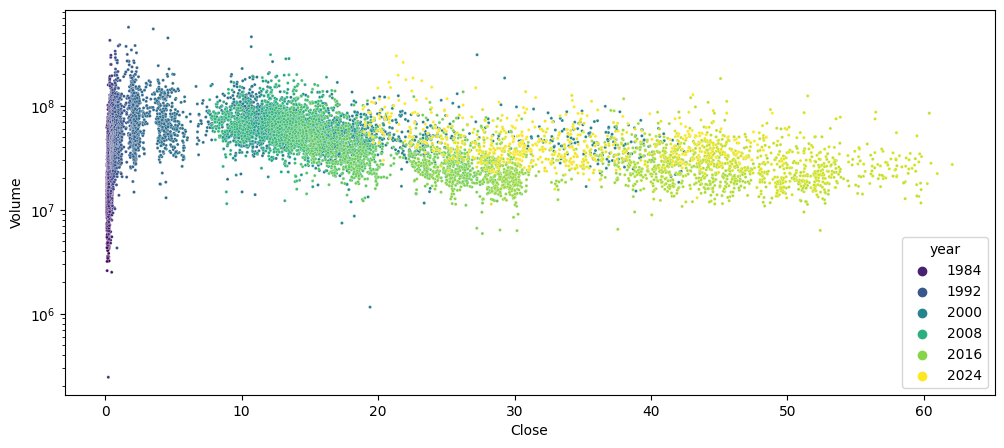

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis', s=5)

When we look at the log of the volume as a function of the price we see the sharp run-up in the early years, and then a slight downward slope over the rest of the price direction, with the lower prices between $10 and $20 thick with points because of the stock spending so much time trading in that range.